# Visualizing Earning Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community](https://www.census.gov/programs-surveys/acs/) Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

 Here are some of the columns in the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:

    Do students in more popular majors make more money?
        Using scatter plots
    How many majors are predominantly male? Predominantly female?
        Using histograms
    Which category of majors have the most students?
        Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [7]:
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [10]:
print(recent_grads.head())
print('_____________')
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [12]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [26]:
raw_data_count=len(recent_grads)
recent_gras=recent_grads.dropna()
cleaned_data_count=len(recent_grads)
print(raw_data_count , cleaned_data_count)

173 173


The dataset didn t contain any null or empty value.

Pandas, Scatter Plots: 

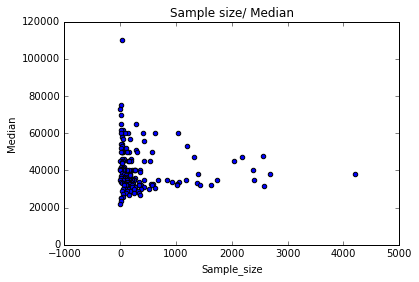

In [30]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample size/ Median')

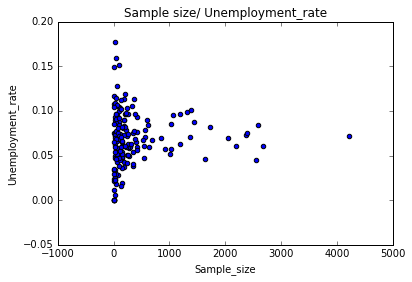

In [31]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample size/ Unemployment_rate')

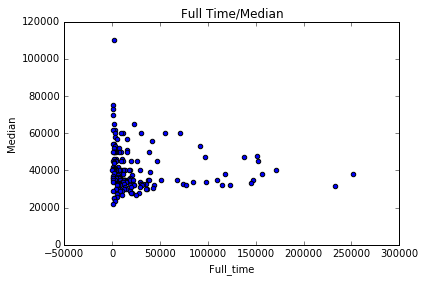

In [33]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time/Median')

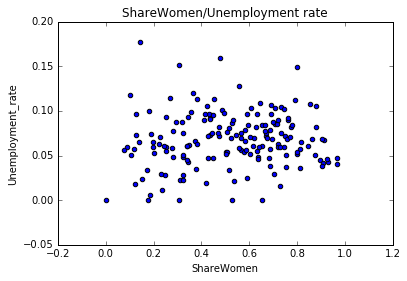

In [40]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen/Unemployment rate')

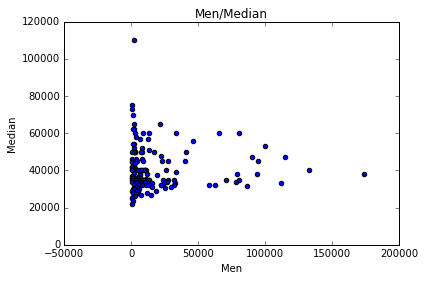

In [38]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men/Median')

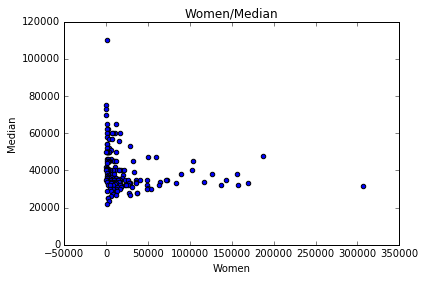

In [41]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women/Median')

Answering some question: 
    
    Do students in more popular majors make more money?
    Do students that majored in subjects that were majority female make more money?
    Is there any link between the number of full-time employees and median salary?


# Pandas, Histograms :

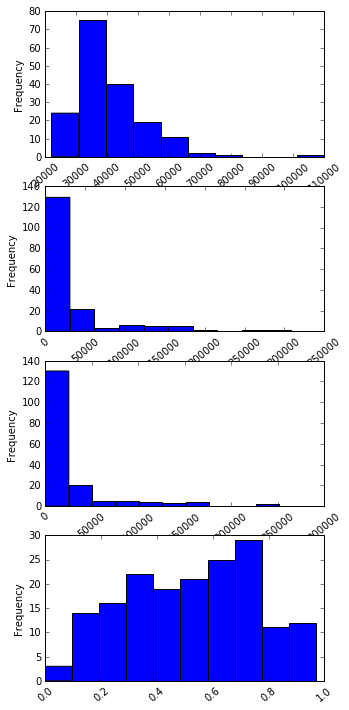

In [43]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

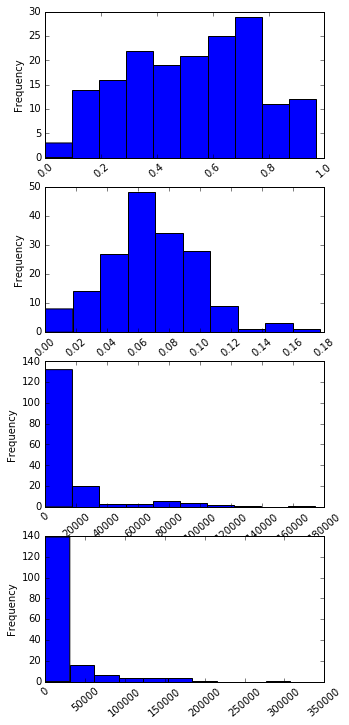

In [45]:
fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

Use the plots to explore the following questions:

    What percent of majors are predominantly male? Predominantly female?
    What's the most common median salary range?


# Pandas, Scatter Matrix Plot:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93aa91b710>,
      dtype=object)

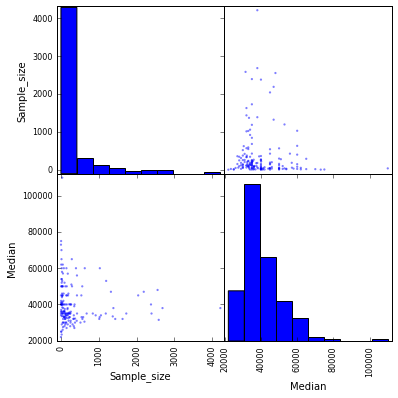

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93aa7cb710>,
      dtype=object)

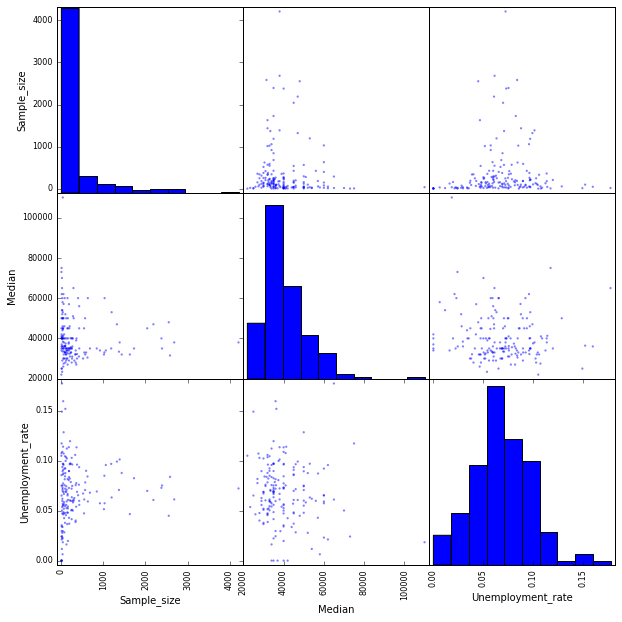

In [49]:

scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

# Pandas, Bar Plots :

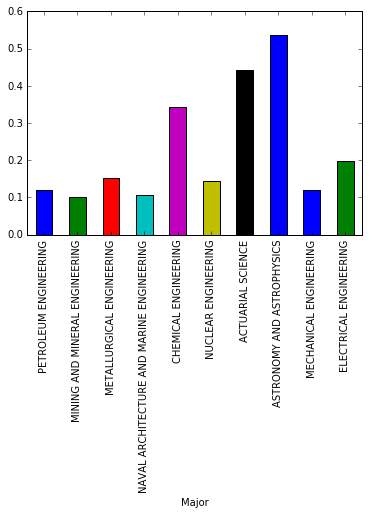

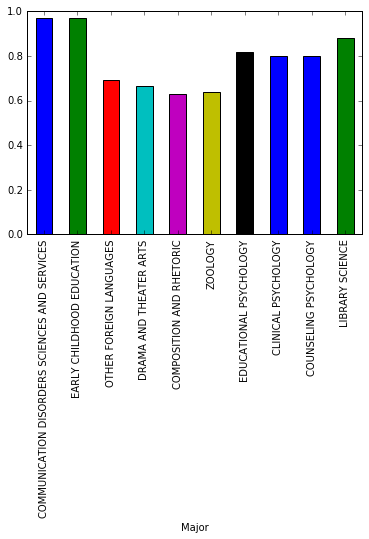

In [50]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)